# 1. Problem and data analysis/visualization

For this Machine Learning challenge, you are going to predict electric scooter renting, based on variables like date, hour, temperature, wind, humidity, etc. Your goal is to build a regression model that is able to predict the **E-scooter counts** as well as possible.

### Kaggle Challenge Following Steps

1. Problem and data analysis/visualization
2. Preprocessing and feature extraction
3. Training/validation/test split strategy
4. Model training and hyperparameter tuning
5. Analysis of performance and errors
6. Learn from your analysis and repeat

In [1]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

# standard packages used to handle files:
import sys
import os 
import glob
import time

# scikit-learn machine learning library:
import sklearn
# import preprocessing from sklearn
from sklearn import preprocessing
# plotting:
import matplotlib.pyplot as plt

# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



# tell matplotlib that we plot in a notebook:
%matplotlib notebook

/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Define your folder structure with your data:

In [2]:
data_folder = "./"

In [3]:
train_data = pd.read_csv(data_folder + "train.csv")
test_data = pd.read_csv(data_folder + "test.csv")

### Data exploration
Let's take a look at our train and test data:

In [4]:
train_data.head()

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,E-scooter Count
0,07/10/2018,22,13.6,38,1.5,2000,-0.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,1160
1,04/02/2018,0,-10.4,49,2.4,2000,-19.0,0.00,0.0,0.0,Winter,No Holiday,Yes,98
2,31/07/2018,20,33.5,50,2.1,2000,21.6,0.04,0.0,0.0,Summer,No Holiday,Yes,1772
3,15/09/2018,0,21.8,83,1.5,2000,18.7,0.00,0.0,0.0,Autumn,No Holiday,Yes,906
4,10/03/2018,6,1.1,78,1.1,538,-2.3,0.00,0.0,0.0,Spring,No Holiday,Yes,74


Let's take a look at our first 200 datapoints in the training set (which spans about the entire time period of all the data, but only 200 random samples of it!):

<IPython.core.display.Javascript object>


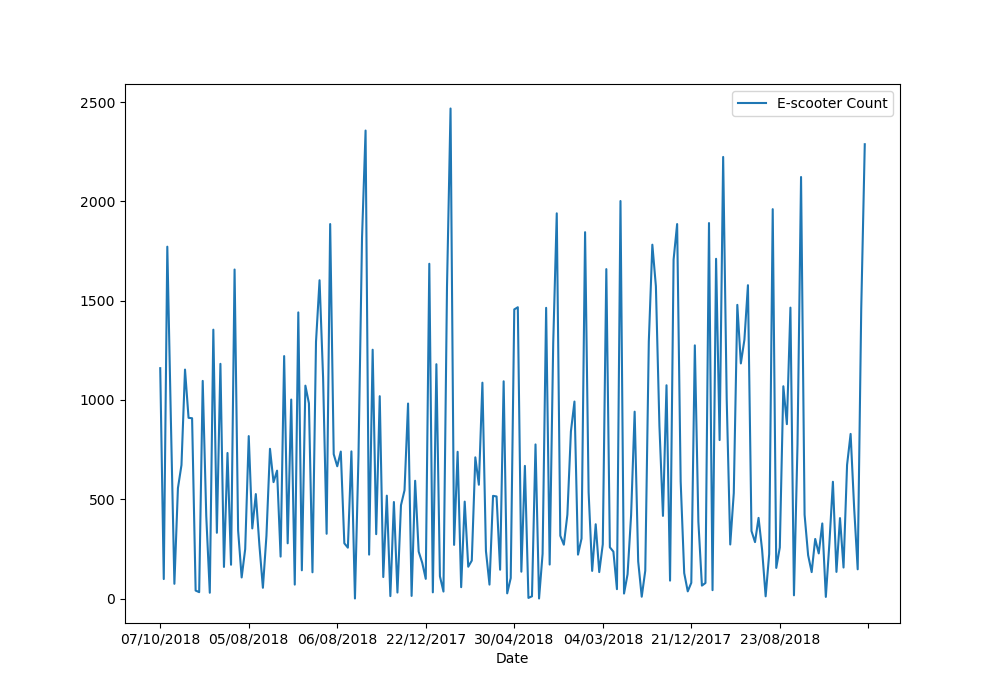

<AxesSubplot:xlabel='Date'>

In [5]:
train_data[0:200].plot(x="Date", y="E-scooter Count", figsize=(10,7))

In [6]:
test_data.head()

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,02/07/2018,16,25.2,87,0.9,601,22.8,0.88,0.0,0.0,Summer,No Holiday,Yes
1,27/10/2018,21,7.3,49,3.4,2000,-2.7,0.00,0.0,0.0,Autumn,No Holiday,Yes
2,16/02/2018,13,3.5,17,3.2,1971,-19.3,2.20,0.0,0.0,Winter,Holiday,Yes
3,10/08/2018,10,30.5,58,0.6,1875,21.2,1.84,0.0,0.0,Summer,No Holiday,Yes
4,08/01/2018,17,2.7,50,2.8,1957,-6.7,0.06,0.0,0.0,Winter,No Holiday,Yes


# 2. Preprocessing and feature extraction

We feature extracted year,month and day base on Date column to create model.Also We need to transfrom Seasons,Holiday,Functioning Day categorical values to numeric value.We will do this preprocessing both train and test data.

In [7]:
# train_data['year'] = train_data["Date"].dt.year
# train_data.head()
# train_data['year']= pd.to_datetime(train_data['Date']) 
# https://stackoverflow.com/questions/68291752/how-to-extract-data-by-date-in-python-pandas
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data["Date"].dt.year
train_data['Month'] = train_data["Date"].dt.month
train_data['Day'] = train_data["Date"].dt.day

# Add E-scooter Count to last column to test data for correct prediction
escooter_count = train_data.pop('E-scooter Count')
train_data.insert(len(train_data.columns), escooter_count.name, escooter_count) 

train_data.head()

/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31/07/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/09/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '23/05/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/05/2018' in

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,E-scooter Count
0,2018-07-10,22,13.6,38,1.5,2000,-0.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,7,10,1160
1,2018-04-02,0,-10.4,49,2.4,2000,-19.0,0.00,0.0,0.0,Winter,No Holiday,Yes,2018,4,2,98
2,2018-07-31,20,33.5,50,2.1,2000,21.6,0.04,0.0,0.0,Summer,No Holiday,Yes,2018,7,31,1772
3,2018-09-15,0,21.8,83,1.5,2000,18.7,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,9,15,906
4,2018-10-03,6,1.1,78,1.1,538,-2.3,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,10,3,74


In [8]:
train_data = train_data.drop('Date', axis=1)

In [9]:
train_data.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,E-scooter Count
0,22,13.6,38,1.5,2000,-0.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,7,10,1160
1,0,-10.4,49,2.4,2000,-19.0,0.00,0.0,0.0,Winter,No Holiday,Yes,2018,4,2,98
2,20,33.5,50,2.1,2000,21.6,0.04,0.0,0.0,Summer,No Holiday,Yes,2018,7,31,1772
3,0,21.8,83,1.5,2000,18.7,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,9,15,906
4,6,1.1,78,1.1,538,-2.3,0.00,0.0,0.0,Spring,No Holiday,Yes,2018,10,3,74


In [10]:
# Convert test data to dateTime 
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data['Year'] = test_data["Date"].dt.year
test_data['Month'] = test_data["Date"].dt.month
test_data['Day'] = test_data["Date"].dt.day

test_data.head()

/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/02/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/10/2018' in

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,2018-02-07,16,25.2,87,0.9,601,22.8,0.88,0.0,0.0,Summer,No Holiday,Yes,2018,2,7
1,2018-10-27,21,7.3,49,3.4,2000,-2.7,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,10,27
2,2018-02-16,13,3.5,17,3.2,1971,-19.3,2.20,0.0,0.0,Winter,Holiday,Yes,2018,2,16
3,2018-10-08,10,30.5,58,0.6,1875,21.2,1.84,0.0,0.0,Summer,No Holiday,Yes,2018,10,8
4,2018-08-01,17,2.7,50,2.8,1957,-6.7,0.06,0.0,0.0,Winter,No Holiday,Yes,2018,8,1


In [11]:
test_data = test_data.drop('Date', axis=1)

In [12]:
test_data.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,16,25.2,87,0.9,601,22.8,0.88,0.0,0.0,Summer,No Holiday,Yes,2018,2,7
1,21,7.3,49,3.4,2000,-2.7,0.00,0.0,0.0,Autumn,No Holiday,Yes,2018,10,27
2,13,3.5,17,3.2,1971,-19.3,2.20,0.0,0.0,Winter,Holiday,Yes,2018,2,16
3,10,30.5,58,0.6,1875,21.2,1.84,0.0,0.0,Summer,No Holiday,Yes,2018,10,8
4,17,2.7,50,2.8,1957,-6.7,0.06,0.0,0.0,Winter,No Holiday,Yes,2018,8,1


In [13]:
# view columns using df.columns
train_data.columns

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day',
       'E-scooter Count'],
      dtype='object')

In [14]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

In [15]:
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
# you can apply spesific columns https://stackoverflow.com/questions/50258960/how-to-apply-labelencoder-for-a-specific-column-in-pandas-dataframe
# train_data = train_data.apply(le.fit_transform)
train_data['Seasons'] = le.fit_transform(train_data['Seasons'])
train_data['Holiday'] = le.fit_transform(train_data['Holiday'])
train_data['Functioning Day'] = le.fit_transform(train_data['Functioning Day'])
# train_data['Seasons'] = le.fit_transform(train_data['Seasons'])

train_data.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,E-scooter Count
0,22,13.6,38,1.5,2000,-0.4,0.00,0.0,0.0,0,1,1,2018,7,10,1160
1,0,-10.4,49,2.4,2000,-19.0,0.00,0.0,0.0,3,1,1,2018,4,2,98
2,20,33.5,50,2.1,2000,21.6,0.04,0.0,0.0,2,1,1,2018,7,31,1772
3,0,21.8,83,1.5,2000,18.7,0.00,0.0,0.0,0,1,1,2018,9,15,906
4,6,1.1,78,1.1,538,-2.3,0.00,0.0,0.0,1,1,1,2018,10,3,74


In [16]:
test_data['Seasons'] = le.fit_transform(test_data['Seasons'])
test_data['Holiday'] = le.fit_transform(test_data['Holiday'])
test_data['Functioning Day'] = le.fit_transform(test_data['Functioning Day'])
# test_data['Seasons'] = le.fit_transform(test_data['Seasons'])
test_data.head()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,16,25.2,87,0.9,601,22.8,0.88,0.0,0.0,2,1,1,2018,2,7
1,21,7.3,49,3.4,2000,-2.7,0.00,0.0,0.0,0,1,1,2018,10,27
2,13,3.5,17,3.2,1971,-19.3,2.20,0.0,0.0,3,0,1,2018,2,16
3,10,30.5,58,0.6,1875,21.2,1.84,0.0,0.0,2,1,1,2018,10,8
4,17,2.7,50,2.8,1957,-6.7,0.06,0.0,0.0,3,1,1,2018,8,1


In [17]:
# take last column for train model which is E-scooter Count
X, y = train_data.iloc[:,:-1],train_data.iloc[:,-1]

# X.head()
y.head()


0    1160
1      98
2    1772
3     906
4      74
Name: E-scooter Count, dtype: int64

In [18]:
# can be using for random forest
# data_dmatrix = xgb.DMatrix(data=X,label=y)


# 3) Training/validation/test split strategy

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train.head()
# X_test.head()
# y_train.head()
# y_test.head()

# additionally k fold can be use 

# 4) Model training and hyperparameter tuning

In [20]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10,verbosity = 0)

# The XGBoost objective parameter refers to the function to be me minimised and not to the model.
# 'reg:linear' tells XGBoost to minimize the mean square error.

xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.7,
                          learning_rate= 0.01, 
                          max_depth= 10, 
                          n_estimators= 1000)

# make the pipeline

In [21]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

/Users/erdo/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [22]:
# Fine tunning parameter using GridSearchCV

# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 500, 1000],
#            'colsample_bytree': [0.3, 0.7]}

# xgbr_model = xgb.XGBRegressor(seed = 20)

# grid_cv_model = GridSearchCV(estimator=xgbr_model, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# grid_cv_model.fit(X_train,y_train)


# output of GridSearchCV
# GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
#                                     colsample_bylevel=None,
#                                     colsample_bynode=None,
#                                     colsample_bytree=None,
#                                     enable_categorical=False, gamma=None,
#                                     gpu_id=None, importance_type=None,
#                                     interaction_constraints=None,
#                                     learning_rate=None, max_delta_step=None,
#                                     max_depth=None, min_child_weight=None,
#                                     missing=nan, monotone_constraints=None,
#                                     n_esti...
#                                     num_parallel_tree=None, predictor=None,
#                                     random_state=None, reg_alpha=None,
#                                     reg_lambda=None, scale_pos_weight=None,
#                                     seed=20, subsample=None, tree_method=None,
#                                     validate_parameters=None, verbosity=None),
#              param_grid={'colsample_bytree': [0.3, 0.7],
#                          'learning_rate': [0.01, 0.05, 0.1],
#                          'max_depth': [3, 6, 10],
#                          'n_estimators': [100, 500, 1000]},
#              scoring='neg_mean_squared_error', verbose=1)

In [23]:
# print("Best parameters:", grid_cv_model.best_params_)
# print("Lowest RMSE: ", (-grid_cv_model.best_score_)**(1/2.0))
# Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}
# Lowest RMSE:  4.3934944370108235

# 5) Analysis of performance and errors

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

predsTrain = xg_reg.predict(X_train)
rmseTrain = np.sqrt(mean_squared_error(y_train, predsTrain))
print("Train RMSE: %f" % (rmseTrain))


RMSE: 567.185826
Train RMSE: 534.929870


### Building a first submission

For a first submission, let's just take the average consumption for the E-scooter count of the training set, and use this value for all test samples:

Create a unique filename based on timestamp:

In [25]:
def generate_unique_filename(basename, file_ext):
    """Adds a timestamp to filenames for easier tracking of submissions, models, etc."""
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    return basename + '_' + timestamp + '.' + file_ext

Let's create our pandas dataframe and write it to csv. You can submit this file to Kaggle. It is very important that your submission also has the 'Id' and 'Predicted' column, with the Ids corresponding to the index of the test dataset. Normally your test data does not get mixed when doing predictions, so this should not be a problem.

In [26]:
def generate_kaggle_submission(model):
    kaggle_data = pd.read_csv("test.csv")
#     kaggle_data = prepareX(kaggle_data)
#     kaggle_xs = selectFeatures(kaggle_data)
    

    predictions = model.predict(test_data)

    submission = pd.DataFrame(data=predictions, columns=["Predicted"])
    submission.index.name = "Id"
    submission.head()

    name = generate_unique_filename("escooter_submission", "csv")
    submission.to_csv(name)
    print("done: " + name)

In [27]:
generate_kaggle_submission(xg_reg)

done: escooter_submission_20221210-002920.csv
